Visualise and download Sentinel products using geojson

In [5]:
import geopandas as gpd
import folium
import os
from sentinelsat.sentinel import SentinelAPI, read_geojson, geojson_to_wkt
import matplotlib.pyplot as plt
import numpy as np
import os
#from geojson import Point
from geojson import Polygon
import geojson
import tempfile
import datetime as dt


Show geojson boundary on folium map


In [6]:
m = folium.Map(location=[35.9452,14.3797], zoom_start=10)
boundsdata = r'../data/SouthMalta.geojson'
folium.GeoJson(boundsdata).add_to(m)
m


Connect to Sentinelsat API

In [7]:
user = 'tertiadecima' ## change this!
password = 'contr0LPane!' ## change this!

api = SentinelAPI(user, password, 'https://scihub.copernicus.eu/dhus')

#convert geojson to well-known-text
footprint = geojson_to_wkt(read_geojson(boundsdata))

print (footprint)


MULTIPOLYGON(((14.5306 35.9046,14.5059 35.8866,14.4562 35.8504,14.4725 35.8108,14.5334 35.8040,14.5697 35.8174,14.5836 35.8489,14.5778 35.8766,14.5462 35.9003,14.5306 35.9046)))


Search for Sentinel Products

In [8]:
#search sentinel product
products = api.query(footprint,
                     #YmD
                     date = ('20210420', '20210505'),
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-1C',
                     cloudcoverpercentage = (0, 5))

Print table with Sentinel products found

In [9]:
api.to_geodataframe(products)


C:\Users\MCAST\anaconda3\envs\remsen\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,title,link,link_alternative,link_icon,summary,ondemand,datatakesensingstart,generationdate,beginposition,endposition,...,producttype,platformidentifier,orbitdirection,platformserialidentifier,processinglevel,datastripidentifier,granuleidentifier,identifier,uuid,geometry
120940ac-985d-48a2-8e53-0e7388ca9ed8,S2A_MSIL1C_20210504T094031_N0300_R036_T33SVV_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2021-05-04T09:40:31.024Z, Instrument: MS...",false,2021-05-04 09:40:31.024,2021-05-04 10:53:22,2021-05-04 09:40:31.024,2021-05-04 09:40:31.024,...,S2MSI1C,2015-028A,DESCENDING,Sentinel-2A,Level-1C,S2A_OPER_MSI_L1C_DS_VGS4_20210504T105322_S2021...,S2A_OPER_MSI_L1C_TL_VGS4_20210504T105322_A0306...,S2A_MSIL1C_20210504T094031_N0300_R036_T33SVV_2...,120940ac-985d-48a2-8e53-0e7388ca9ed8,"MULTIPOLYGON (((14.18961 35.15109, 15.10716 35..."


Visualise product footprints

C:\Users\MCAST\anaconda3\envs\remsen\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


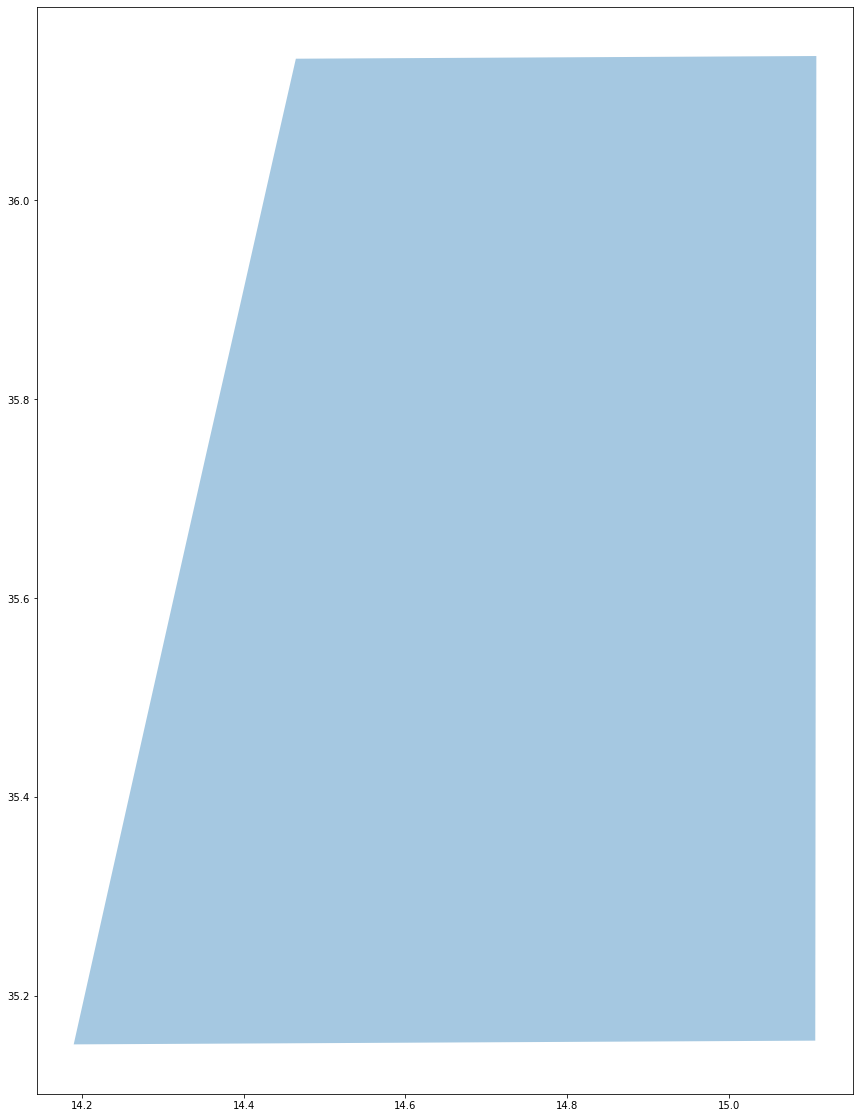

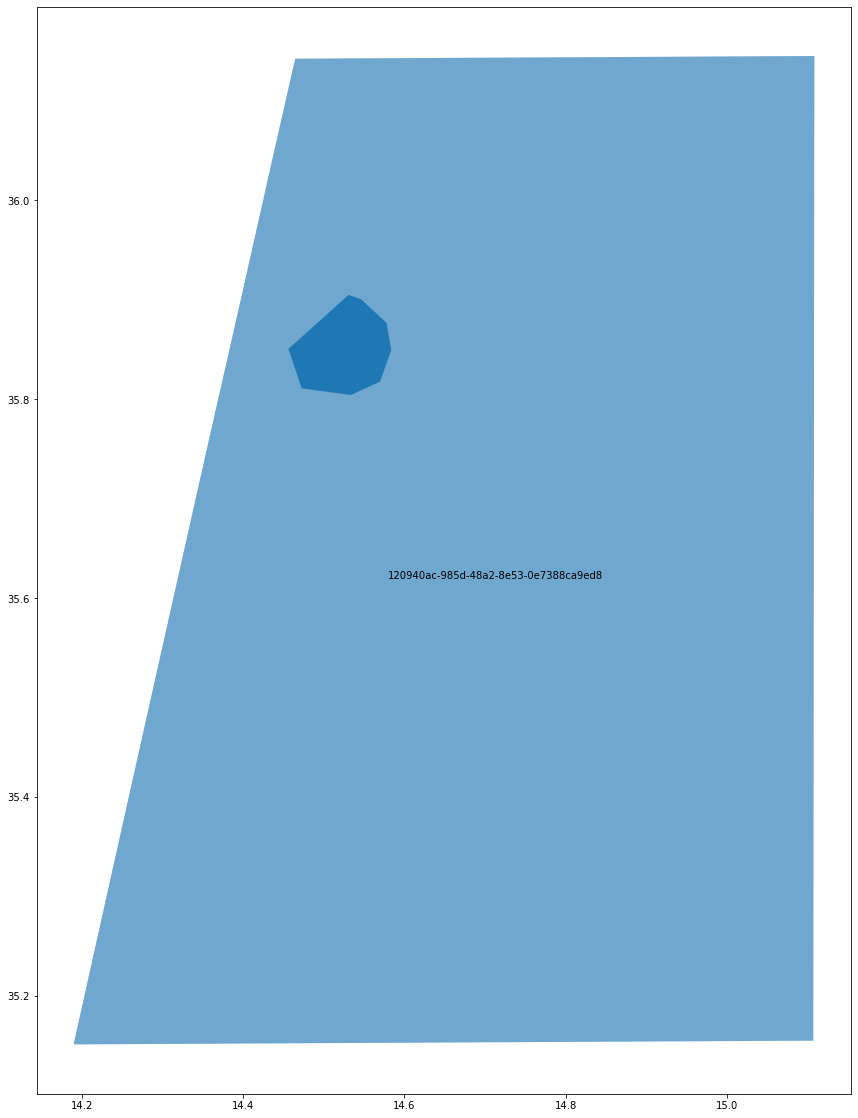

C:\Users\MCAST\anaconda3\envs\remsen\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,title,link,link_alternative,link_icon,summary,ondemand,datatakesensingstart,generationdate,beginposition,endposition,...,producttype,platformidentifier,orbitdirection,platformserialidentifier,processinglevel,datastripidentifier,granuleidentifier,identifier,uuid,geometry
120940ac-985d-48a2-8e53-0e7388ca9ed8,S2A_MSIL1C_20210504T094031_N0300_R036_T33SVV_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2021-05-04T09:40:31.024Z, Instrument: MS...",false,2021-05-04 09:40:31.024,2021-05-04 10:53:22,2021-05-04 09:40:31.024,2021-05-04 09:40:31.024,...,S2MSI1C,2015-028A,DESCENDING,Sentinel-2A,Level-1C,S2A_OPER_MSI_L1C_DS_VGS4_20210504T105322_S2021...,S2A_OPER_MSI_L1C_TL_VGS4_20210504T105322_A0306...,S2A_MSIL1C_20210504T094031_N0300_R036_T33SVV_2...,120940ac-985d-48a2-8e53-0e7388ca9ed8,"MULTIPOLYGON (((14.18961 35.15109, 15.10716 35..."


In [10]:
areas = api.to_geodataframe(products)
areas.plot(column='uuid', cmap=None, alpha=0.4, figsize=(20, 20))

ax = areas.plot(column='uuid', cmap=None, alpha=0.4, figsize=(20, 20))
areas.apply(lambda x: ax.annotate(s=x.uuid, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)

gdf2 = gpd.read_file(boundsdata)
#f, ax = plt.subplots(1)
areas.plot(ax=ax,column='uuid',cmap=None, alpha=0.4, figsize=(20, 20))
gdf2.plot(ax=ax)
plt.show()

products_gdf = api.to_geodataframe(products)
products_gdf_sorted = products_gdf.sort_values(['cloudcoverpercentage'], ascending=[True])
products_gdf_sorted


Connect to Sentinelsat API and download all products


In [11]:
api.download_all(products)

Downloading: 100%|██████████| 416M/416M [04:20<00:00, 1.60MB/s] 
MD5 checksumming: 100%|██████████| 416M/416M [00:00<00:00, 439MB/s] 


({'120940ac-985d-48a2-8e53-0e7388ca9ed8': {'id': '120940ac-985d-48a2-8e53-0e7388ca9ed8',
   'title': 'S2A_MSIL1C_20210504T094031_N0300_R036_T33SVV_20210504T105322',
   'size': 415881224,
   'md5': '8b6f9132f6cff943546002547c26e7e6',
   'date': datetime.datetime(2021, 5, 4, 9, 40, 31, 24000),
   'footprint': 'POLYGON((14.189605184463218 35.15108963083955,14.191530015422764 35.15811327674045,14.232092489369192 35.30571520031406,14.272810045059604 35.453383619541526,14.313654152267228 35.60105397451958,14.354627000817786 35.74873028046907,14.395991089688096 35.89629404986511,14.436973337048766 36.04395697969393,14.464480422129643 36.14215133472034,15.108489607947968 36.14484927635336,15.107159202344487 35.1548426456455,14.189605184463218 35.15108963083955))',
   'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('120940ac-985d-48a2-8e53-0e7388ca9ed8')/$value",
   'Online': True,
   'Creation Date': datetime.datetime(2021, 5, 4, 22, 2, 0, 309000),
   'Ingestion Date': datetime.dat

Connect to Sentinelsat API and download a single products

Get the uuid and inspect product data

In [12]:
api.get_product_odata('6cc7c1a3-1a86-411c-a516-5fb82c8b59a4')

{'id': '6cc7c1a3-1a86-411c-a516-5fb82c8b59a4',
 'title': 'S2B_MSIL1C_20210208T094049_N0209_R036_T33SVV_20210208T115143',
 'size': 459998996,
 'md5': '1C1F851DC2234D9409D6452A7117795E',
 'date': datetime.datetime(2021, 2, 8, 9, 40, 49, 24000),
 'footprint': 'POLYGON((14.17618595344088 35.151034742983654,14.210655962279054 35.2753557555336,14.2513334612328 35.4229818910445,14.291928993281728 35.570571600954786,14.332599205608378 35.718141442784486,14.373927744329125 35.86557210091576,14.414598163593093 36.013259150831054,14.450522854461417 36.14209286241321,15.108489607947968 36.14484927635336,15.107159202344487 35.1548426456455,14.17618595344088 35.151034742983654))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('6cc7c1a3-1a86-411c-a516-5fb82c8b59a4')/$value",
 'Online': False,
 'Creation Date': datetime.datetime(2021, 2, 8, 14, 45, 5, 358000),
 'Ingestion Date': datetime.datetime(2021, 2, 8, 14, 44, 30, 160000)}

Download the data

In [13]:
api.download('16eb9527-fd2a-44c1-a4e6-36e506a6d7c4')

Product 16eb9527-fd2a-44c1-a4e6-36e506a6d7c4 is not online. Triggering retrieval from long term archive.


{'id': '16eb9527-fd2a-44c1-a4e6-36e506a6d7c4',
 'title': 'S2A_MSIL1C_20181007T094031_N0206_R036_T33SVV_20181007T115542',
 'size': 363264257,
 'md5': 'C6A6201FA1AA7AB5BBDF971E4CD3A17B',
 'date': datetime.datetime(2018, 10, 7, 9, 40, 31, 24000),
 'footprint': 'POLYGON((14.18028550187583 35.15105151111466,14.218458271117356 35.290216441525445,14.259005982777753 35.43773282642145,14.299623005551824 35.58524911186538,14.340557995360236 35.732767098364995,14.382017565269187 35.880245260785095,14.42302482927292 36.027945658080675,14.45515128601461 36.142112252258045,15.108489607947968 36.14484927635336,15.107159202344487 35.1548426456455,14.18028550187583 35.15105151111466))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('16eb9527-fd2a-44c1-a4e6-36e506a6d7c4')/$value",
 'Online': False,
 'Creation Date': datetime.datetime(2018, 10, 7, 16, 37, 28, 795000),
 'Ingestion Date': datetime.datetime(2018, 10, 7, 16, 29, 32, 186000),
 'path': '.\\S2A_MSIL1C_20181007T094031_N0206_R036_T